In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def print_table(u, index, columns):
    pd.set_option("precision", 12)
    df = pd.DataFrame(data=u, index=index, columns=columns)
    return df

### Pregunta 1

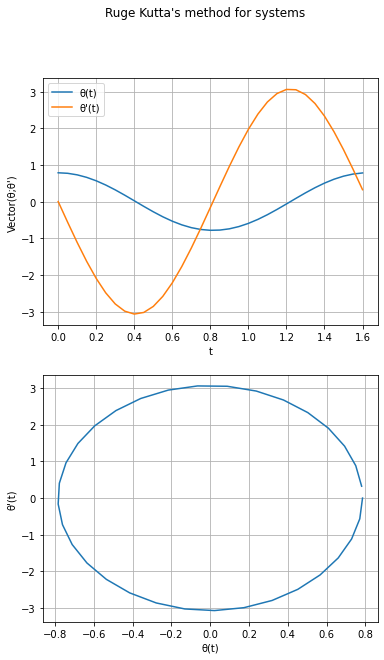

Runge Kutta's method order 4
[t[k]		x(t[k])		y(t[k])


,t[k],θ(t[k]),θ'(t[k])
0,0.00,0.785398163397,0.000000000000
1,0.05,0.771201510518,-0.566506502867
2,0.10,0.729020614782,-1.116592667370
3,0.15,0.660102156519,-1.633053950396
4,0.20,0.566582059967,-2.097514424189
5,0.25,0.451539046876,-2.490768295609
6,0.30,0.319008921631,-2.794016179519
7,0.35,0.173916335973,-2.990882175134
8,0.40,0.021895027726,-3.069756259240
9,0.45,-0.131002656820,-3.025756074598


In [3]:
def rk4_vector(F, a, b, x0, n):
    """
    x0 = [t0, x, y] init value (x(t0), y(t0))
    """
    u = np.zeros((n + 1, len(x0)))
    u[0] = np.copy(x0)
    h = (b - a)/n
    for i in range(n):
        K1 = F(u[i])
        K2 = F(u[i] + 1/2*h*K1)
        K3 = F(u[i] + 1/2*h*K2)
        K4 = F(u[i] + h*K3)
        # Runge Kutta's method
        u[i + 1] = u[i] + 1/6*h*(K1 + 2*K2 + 2*K3 + K4)
    return u

def F(x):
    """
    x = [t, y(t), z(t)]
    """
    g = 32.2
    l = 2
    dt = 1
    dy = x[2]
    dz = -g/l*np.sin(x[1])
    return np.array([dt, dy, dz])
    
# Runge Kutta order 4
# x0 = x(t0) = [0, pi/4, 0]
a = 0
b = 1.6
n = 32
x0 = np.array([a, np.pi/4, 0])
u = rk4_vector(F, a, b, x0, n)

# Graphic
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)
fig.suptitle("Ruge Kutta's method for systems")
ax1.grid(True)
ax1.plot(u[:, 0], u[:, 1])
ax1.plot(u[:, 0], u[:, 2])
ax1.set_xlabel("t")
ax1.set_ylabel("Vector(θ;θ')")
ax1.legend(("θ(t)", "θ'(t)"))

ax2.plot(u[:, 1], u[:, 2])
ax2.set_xlabel("θ(t)")
ax2.set_ylabel("θ'(t)")
plt.grid(True)
plt.show()

# print
np.set_printoptions(precision=10, suppress=True)
print("Runge Kutta's method order 4")
print("[t[k]\t\tx(t[k])\t\ty(t[k])")
print_table(u, range(len(u[:,0])), ['t[k]', 'θ(t[k])', "θ'(t[k])"])

### Pregunta 2

Runge Kutta O4, para z(1)=2
   t[k]          y(t[k])          z(t[k])
0   1.0   4.000000000000   2.000000000000
1   1.2   4.494139530779   3.029376559935
2   1.4   5.262044458026   4.844659061205
3   1.6   6.552545590369   8.583002418025
4   1.8   9.063267695304  18.452682406087
5   2.0  15.676641353061  60.852127730452

Runge Kutta O4, para z(1)=1
   t[k]         y(t[k])         z(t[k])
0   1.0  4.000000000000  1.000000000000
1   1.2  4.232784045767  1.343715416412
2   1.4  4.545390338224  1.807747243780
3   1.6  4.968781900318  2.468761474015
4   1.8  5.555160262725  3.471469477664
5   2.0  6.398984378726  5.117754022239

Runge Kutta O4, para z(1)=1.1725668049274593
   t[k]         y(t[k])         z(t[k])
0   1.0  4.000000000000  1.172566804927
1   1.2  4.275713356775  1.607708855363
2   1.4  4.654877989997  2.223022190901
3   1.6  5.185395496447  3.152604413502
4   1.8  5.954326046355  4.676285029168
5   2.0  7.136518143386  7.463077037206

Runge Kutta O4, para z(1)=1.37460271466988

Text(0, 0.5, 'y')

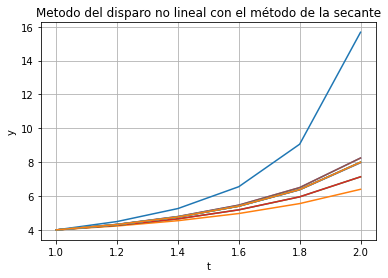

In [9]:
def secant_method(y0, y1, z0, z1, beta):
    """
    z1, z2 any values
    y1, y2 boundary of z1 and z2 respectively 
    beta: boundary condition
    """
    return z1 - (y1 - beta)/(y1 - y0)*(z1 - z0)

def F(u):
    dt = 1
    dy = u[2]
    dz = u[2]*(1/u[0] + 2*u[2]/u[1])
    return np.array([dt, dy, dz])

# valores iniciales y(a)=alpha, y(b)=beta
a = 1   
b = 2
alpha = 4
beta = 8
n = 5
np.set_printoptions(precision=11, suppress=True)

z1 = 2 # considerando como valor inicial  
u0 = [a, alpha, z1]
print(f"Runge Kutta O4, para z(1)={z1}")
u1 = rk4_vector(F, a, b, u0, n)
print(print_table(u1, range(len(u1[:,0])), ['t[k]', 'y(t[k])', "z(t[k])"]))
plt.plot(u1[:,0], u1[:,1])
print()
z2 = 1 # considerando como valor inicial  
u0 = [a, alpha, z2]
print(f"Runge Kutta O4, para z(1)={z2}")
u2 = rk4_vector(F, a, b, u0, n)
print(print_table(u2, range(len(u2[:,0])), ['t[k]', 'y(t[k])', "z(t[k])"]))
plt.plot(u2[:,0], u2[:,1])
for k in range(5):
    # z(0) =  interpolando z1(0) y z2(0)
    z = secant_method(u1[n, 1], u2[n, 1], z1, z2, beta)
    u0 = [a, alpha, z]
    print()
    print(f"Runge Kutta O4, para z(1)={z}")
    u1 = u2
    u2 = rk4_vector(F, a, b, u0, n)
    print(print_table(u2, range(len(u2[:,0])), ['t[k]', 'y(t[k])', "z(t[k])"]))
    plt.plot(u2[:,0], u2[:,1])
    z1 = u1[0, 2]
    z2 = u2[0, 2]
    plt.plot(u2[:,0], u2[:,1])

plt.grid(True)
plt.title("Metodo del disparo no lineal con el método de la secante")
plt.xlabel("t")
plt.ylabel("y")

### Pregunta 3

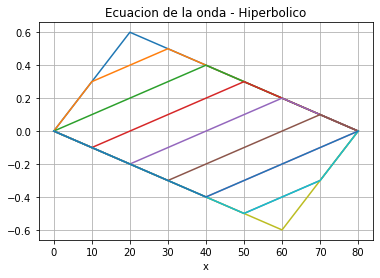

,U0j,U1j,U2j,U3j,U4j,U5j,U6j,U7j,U8j
0,0.0,0.3,0.6,0.5,0.4,0.3,0.2,0.1,0.0
1,0.0,0.3,0.4,0.5,0.4,0.3,0.2,0.1,0.0
2,0.0,0.1,0.2,0.3,0.4,0.3,0.2,0.1,0.0
3,0.0,-0.1,0.0,0.1,0.2,0.3,0.2,0.1,0.0
4,0.0,-0.1,-0.2,-0.1,0.0,0.1,0.2,0.1,0.0
5,0.0,-0.1,-0.2,-0.3,-0.2,-0.1,0.0,0.1,0.0
6,0.0,-0.1,-0.2,-0.3,-0.4,-0.3,-0.2,-0.1,0.0
7,0.0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.4,-0.3,0.0
8,0.0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.3,0.0
9,0.0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.4,-0.3,0.0


In [7]:
def uxa(t):
    return 0


def uxb(t):
    return 0


def uyc(x):
    return 0.03*x if 0 <= x <=20 else 0.01*(80 - x)


def boundary_conditions(uxa, uxb, xInterval, uyc, yInterval):
    """
    uxa: bottom boundary in xInterval
    uya, uyb: left and right boundary in yInterval
    """
    ubottom = np.empty(0)
    uleft = np.empty(0)
    uright = np.empty(0)

    for x in xInterval:
        ubottom = np.append(ubottom, uyc(x))

    for y in yInterval:
        uleft = np.append(uleft, uxa(y))
        uright = np.append(uright, uxb(y))

    return ubottom, uleft, uright


def hiperbolic(uxa, uxb, xInterval, uyc, yInterval):
    ubottom, uleft, uright = boundary_conditions(
        uxa, uxb, xInterval, uyc, yInterval)
    m = len(uleft)
    n = len(ubottom)

    u = np.zeros((m, n))

    u[0, :] = ubottom
    u[:, 0] = uleft
    u[:, -1] = uright

    # adding condition of initial partial central derivative of t
    for i in range(1, len(ubottom) - 1):
        u[1, i] = (u[0, i+1] + u[0, i-1])/2

    for j in range(1, m - 1):
        for i in range(1, n - 1):
            u[j+1, i] = u[j, i+1] + u[j, i-1] - u[j-1, i]
    return u

xa = 0
xb = 80
Δx = 10

yc = 0
yd = 100
Δy = 10

xInterval = np.arange(xa, xb + Δx, Δx)
yInterval = np.arange(yc, yd + Δy, Δy)
u = hiperbolic(uxa, uxb, xInterval, uyc, yInterval)
np.set_printoptions(precision=12, suppress=True)

for uk in u:
    plt.plot(xInterval, uk)
plt.title("Ecuacion de la onda - Hiperbolico")
plt.grid(True)
plt.xlabel("x")
plt.show()

df = pd.DataFrame(data=u, index=range(len(u[:,0])), columns=['U0j', 'U1j','U2j','U3j','U4j','U5j','U6j','U7j', 'U8j'])
df.round(3)

### Pregunta 4

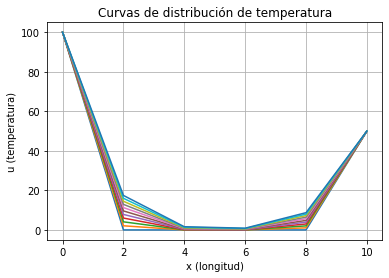

,"u(0, j)","u(1, j)","u(2, j)","u(3, j)","u(4, j)","u(5, j)"
0,100.0,0.000000000000,0.000000000000,0.000000000000,0.000000000000,50.0
1,100.0,2.087500000000,0.000000000000,0.000000000000,1.043750000000,50.0
2,100.0,4.087846875000,0.043576562500,0.021788281250,2.043923437500,50.0
3,100.0,6.005588928711,0.127545874902,0.064455183008,3.002794464355,50.0
4,100.0,7.845018111076,0.248933005457,0.127110033699,3.922523297414,50.0
5,100.0,9.610185081427,0.404958227502,0.208882340115,4.805161371700,50.0
6,100.0,11.304913357277,0.593024253928,0.308922749048,5.652656303282,50.0
7,100.0,12.932812605911,0.810704320046,0.426403805907,6.466856665006,50.0
8,100.0,14.497291132295,1.055731057281,0.560520532574,7.249516578690,50.0
9,100.0,16.001567613343,1.325986104144,0.710490844740,8.002300127648,50.0


In [17]:
def uxa(y):
    return 100

def uxb(y):
    return 50

def uyc(x):
    return 0

def boundary_conditions(uxa, uxb, xInterval, uyc, yInterval):
    """
    uxa: bottom boundary in xInterval
    uya, uyb: left and right boundary in yInterval
    """
    ubottom = np.empty(0)
    uleft = np.empty(0)
    uright = np.empty(0)

    for x in xInterval:
        ubottom = np.append(ubottom, uyc(x))

    for y in yInterval:
        uleft = np.append(uleft, uxa(y))
        uright = np.append(uright, uxb(y))

    return ubottom, uleft, uright

def parabolic_explicit(uxa, uxb, xInterval, uyc, yInterval, lam):
    ubottom, uleft, uright = boundary_conditions(
        uxa, uxb, xInterval, uyc, yInterval)
    m = len(uleft)
    n = len(ubottom)

    u = np.zeros((m, n))

    u[0, :] = ubottom
    u[:, 0] = uleft
    u[:, -1] = uright

    for j in range(m - 1):
        for i in range(1, n - 1):
            u[j+1, i] = lam*u[j, i-1] + (1-2*lam)*u[j, i] + lam*u[j, i+1]
    return u

xa = 0
xb = 10
Δx = 2

ya = 0
yb = 1
Δy = 0.1
lam = 0.835*Δy/(Δx**2)

xInterval = np.arange(xa, xb + Δx, Δx)
yInterval = np.arange(ya, yb + Δy, Δy)
u = parabolic_explicit(uxa, uxb, xInterval, uyc, yInterval, lam)
for uk in u:
    plt.plot(xInterval, uk)
plt.title("Curvas de distribución de temperatura")
plt.ylabel("u (temperatura)")
plt.xlabel("x (longitud)")
plt.grid(True)
plt.show()

print_table(u, range(len(u[:,0])), [f'u({i}, j)' for i in range(6)])

### Pregunta 5

In [62]:
col = [f'u({i}, j)' for i in range(5)]

def uxa(y):
    return 75

def uxb(y):
    return 50

def uyc(x):
    return 0

def uyd(x):
    return 100

def boundary_conditions(uxa, uxb, xInterval, uyc, uyd, yInterval):
    """
    uxa: bottom boundary in xInterval
    uya, uyb: left and right boundary in yInterval
    """
    ubottom = np.empty(0)
    utop = np.empty(0)
    uleft = np.empty(0)
    uright = np.empty(0)

    for x in xInterval:
        ubottom = np.append(ubottom, uyc(x))
        utop = np.append(utop, uyd(x))

    for y in yInterval:
        uleft = np.append(uleft, uxa(y))
        uright = np.append(uright, uxb(y))

    return ubottom, utop, uleft, uright

def elliptical(uxa, uxb, xInterval, uyc, uyd, yInterval):
    ubottom, utop, uleft, uright = boundary_conditions(
        uxa, uxb, xInterval, uyc, uyd, yInterval)
    m = len(uleft)
    n = len(ubottom)

    u = np.full((m, n), (0 + 75 + 100 + 50)/4)
    u[0, :] = ubottom
    u[-1, :] = utop
    u[:, 0] = uleft
    u[:, -1] = uright
    u = np.flip(u, 0)
    
    print("Tabla inicial 0")
    print(print_table(u, range(len(u[:,0])), col))

    for j in range(1, 4):
        for i in range(1, 4):
            u[j,i] = (u[j,i-1] + u[j,i+1] + u[j-1,i] + u[j+1,i])/4
    print("\nIteracion 1") 
    print(print_table(u, range(len(u[:,0])), col))

    for j in range(1, 4):
        for i in range(1, 4):
            u[j,i] = (u[j,i-1] + u[j,i+1] + u[j-1,i] + u[j+1,i])/4
    print("\nIteracion 2")        
    print(print_table(u, range(len(u[:,0])), col))

    for k in range(3, 35):
        for j in range(1, 4):
            for i in range(1, 4):
                u[j,i] = (u[j,i-1] + u[j,i+1] + u[j-1,i] + u[j+1,i])/4
    return u
xa = 0
xb = 4
Δx = 1

ya = 0
yb = 4
Δy = 1

xInterval = np.arange(xa, xb + Δx, Δx)
yInterval = np.arange(ya, yb + Δy, Δy)
u = elliptical(uxa, uxb, xInterval, uyc, uyd, yInterval)
print("...")
print("Iteracion 34")
print(print_table(u, range(len(u[:,0])), col))
u = np.flip(u, 0)

Tabla inicial 0
   u(0, j)  u(1, j)  u(2, j)  u(3, j)  u(4, j)
0     75.0   100.00   100.00   100.00     50.0
1     75.0    56.25    56.25    56.25     50.0
2     75.0    56.25    56.25    56.25     50.0
3     75.0    56.25    56.25    56.25     50.0
4     75.0     0.00     0.00     0.00     50.0

Iteracion 1
   u(0, j)      u(1, j)        u(2, j)         u(3, j)  u(4, j)
0     75.0  100.0000000  100.000000000  100.0000000000     50.0
1     75.0   71.8750000   71.093750000   69.3359375000     50.0
2     75.0   64.8437500   62.109375000   59.4238281250     50.0
3     75.0   49.0234375   41.845703125   37.8173828125     50.0
4     75.0    0.0000000    0.000000000    0.0000000000     50.0

Iteracion 2
   u(0, j)        u(1, j)           u(2, j)           u(3, j)  u(4, j)
0     75.0  100.000000000  100.000000000000  100.000000000000     50.0
1     75.0   77.734375000   77.294921875000   71.679687500000     50.0
2     75.0   65.966796875   61.132812500000   55.157470703125     50.0
3     75

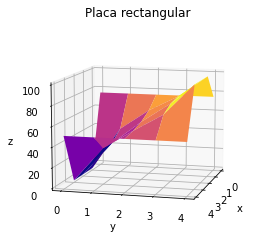

In [71]:
X1, X2 = np.meshgrid(xInterval, yInterval, sparse=True)
Z = np.copy(u)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X1, X2, Z, edgecolor='none', cmap='plasma')
ax.view_init(10, 15)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Placa rectangular')
plt.show()